## 1. Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

## 2. Importing Dataset

In [2]:
Titanic=pd.read_csv(r"C:\Users\roopa\Desktop\Veer_Trainings\Python, AIML, DS\AIML\Titanic.csv")
Titanic

,Unnamed: 0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


## 3. Data Wrangling

In [3]:
Titanic.info() #Name,Cabin No.,Ticket, PassengerId is nominal in nature,Unnamed:0 all are not at all required for analysis
#they are insignificant variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   Age          1046 non-null   float64
 2   Cabin        295 non-null    object 
 3   Embarked     1307 non-null   object 
 4   Fare         1308 non-null   float64
 5   Name         1309 non-null   object 
 6   Parch        1309 non-null   int64  
 7   PassengerId  1309 non-null   int64  
 8   Pclass       1309 non-null   int64  
 9   Sex          1309 non-null   object 
 10  SibSp        1309 non-null   int64  
 11  Survived     891 non-null    float64
 12  Ticket       1309 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [4]:
Titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
Titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [6]:
Titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

<AxesSubplot:xlabel='Survived', ylabel='count'>

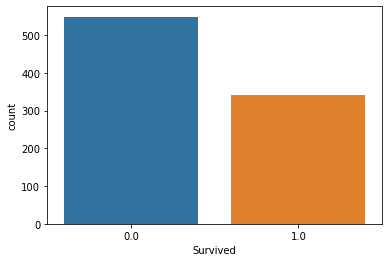

In [7]:
# for visualizing, using bar plots w/t too much code
sns.countplot(x='Survived', data=Titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

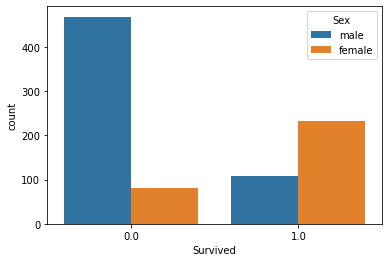

In [8]:
# even more detailed
sns.countplot(x='Survived',hue='Sex',data=Titanic) #hue acts as double bar chart together with original classification
#even legend is automatically created

<AxesSubplot:xlabel='Survived', ylabel='count'>

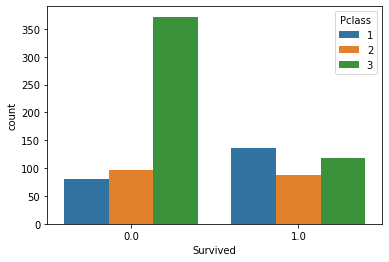

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=Titanic)

In [10]:
Titanic['Sex']=Titanic['Sex'].astype('category')

In [11]:
Titanic['Sex']=Titanic['Sex'].cat.codes

In [12]:
Titanic['Embarked']=Titanic['Embarked'].astype('category')

In [13]:
Titanic['Embarked']=Titanic['Embarked'].cat.codes

In [14]:
Titanic['Embarked'].unique() #don't work with negative values
Titanic['Embarked']=Titanic['Embarked'].replace(-1,3)
Titanic['Embarked'].value_counts()

2    914
0    270
1    123
3      2
Name: Embarked, dtype: int64

In [15]:
Titanic.isna().sum() #we need to treat the missing values

Unnamed: 0        0
Age             263
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [16]:
Titanic=Titanic.drop(['Unnamed: 0','Name', 'Cabin','Ticket','PassengerId'], axis=1)

In [17]:
Titanic

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,2,7.2500,0,3,1,1,0.0
1,38.0,0,71.2833,0,1,0,1,1.0
2,26.0,2,7.9250,0,3,0,0,1.0
3,35.0,2,53.1000,0,1,0,1,1.0
4,35.0,2,8.0500,0,3,1,0,0.0
...,...,...,...,...,...,...,...,...
1304,NaN,2,8.0500,0,3,1,0,NaN
1305,39.0,0,108.9000,0,1,0,0,NaN
1306,38.5,2,7.2500,0,3,1,0,NaN
1307,NaN,2,8.0500,0,3,1,0,NaN


In [18]:
#before finding correlation, we need to fill up all missing values, and a simple scatterplot won't be helpful visually
# treat numerical values with median, and catagorical values with mode
# for 'Survived'--> categorical, fill with the mode, here it is 0
Titanic['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [19]:
Titanic['Survived'].fillna(0,inplace=True) #for permanent changes

In [20]:
Titanic['Fare'].fillna(Titanic['Fare'].median(), inplace=True)

In [21]:
Titanic['Age'].fillna(Titanic['Age'].median(), inplace=True)

In [22]:
Titanic.info() #now, e don't have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Embarked  1309 non-null   int8   
 2   Fare      1309 non-null   float64
 3   Parch     1309 non-null   int64  
 4   Pclass    1309 non-null   int64  
 5   Sex       1309 non-null   int8   
 6   SibSp     1309 non-null   int64  
 7   Survived  1309 non-null   float64
dtypes: float64(3), int64(3), int8(2)
memory usage: 64.0 KB


In [23]:
Titanic.dtypes #all are integer or floating point values, we are good towards modelling

Age         float64
Embarked       int8
Fare        float64
Parch         int64
Pclass        int64
Sex            int8
SibSp         int64
Survived    float64
dtype: object

In [24]:
Titanic.iloc[:,:-2].corr() #all |corr| values are <0.75

,Age,Embarked,Fare,Parch,Pclass,Sex
Age,1.000000,-0.060302,0.178182,-0.125851,-0.377908,0.053663
Embarked,-0.060302,1.000000,-0.235889,0.043835,0.182154,0.095215
Fare,0.178182,-0.235889,1.000000,0.221635,-0.558683,-0.185681
Parch,-0.125851,0.043835,0.221635,1.000000,0.018322,-0.213125
Pclass,-0.377908,0.182154,-0.558683,0.018322,1.000000,0.124617
Sex,0.053663,0.095215,-0.185681,-0.213125,0.124617,1.000000


## 4. Splitting into IV and DV

In [25]:
X=Titanic.iloc[:,:7].values
Y=Titanic.iloc[:,7]

In [26]:
X,Y

(array([[22.    ,  2.    ,  7.25  , ...,  3.    ,  1.    ,  1.    ],
        [38.    ,  0.    , 71.2833, ...,  1.    ,  0.    ,  1.    ],
        [26.    ,  2.    ,  7.925 , ...,  3.    ,  0.    ,  0.    ],
        ...,
        [38.5   ,  2.    ,  7.25  , ...,  3.    ,  1.    ,  0.    ],
        [28.    ,  2.    ,  8.05  , ...,  3.    ,  1.    ,  0.    ],
        [28.    ,  0.    , 22.3583, ...,  3.    ,  1.    ,  1.    ]]),
 0       0.0
 1       1.0
 2       1.0
 3       1.0
 4       0.0
        ... 
 1304    0.0
 1305    0.0
 1306    0.0
 1307    0.0
 1308    0.0
 Name: Survived, Length: 1309, dtype: float64)

## 5. Further splitting into train and test data

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)

## 6. Modelling

In [39]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred=log_reg.predict(X_test)
Y_pred

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [37]:
#but we need it more graphically

## 7. Evaluation

In [40]:
confusion_matrix(Y_test,Y_pred) #gives us an idea of how many rightly predicted values and how many incorrectly predicted
#values are there

array([[180,  16],
       [ 40,  26]], dtype=int64)

In [41]:
accuracy_score(Y_test,Y_pred) #it internally needs the confusion matrix also, as it ultimately does, (180+26)/(180+26+40+16)

0.7862595419847328